# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [85]:
# The dataset represents 17 marketing campaigns that were conducted between May 2008 and November 2010
print("The dataset represents 17 marketing campaigns that were conducted between May 2008 and November 2010")

The dataset represents 17 marketing campaigns that were conducted between May 2008 and November 2010


### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [86]:
import pandas as pd

In [87]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [88]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [89]:
# Check for missing values
missing_values = df.isnull().sum()

# Display missing values
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [90]:
df.duplicated().sum()

12

In [91]:
df.drop_duplicates(inplace=True)

In [92]:
df.duplicated().sum()

0

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

In [127]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [94]:
import textwrap

business_objective = "Business Objective: The objective of this task is to develop a predictive model that accurately classifies whether a client will subscribe to a term deposit based on various input features related to the client's demographics, previous interactions, financial information and broader economy indicators. This model can help the bank optimize its marketing strategies, personalize client interactions, and improve the overall success rate of its marketing campaigns."

wrapped_text = textwrap.fill(business_objective, width=100)

print(wrapped_text)

Business Objective: The objective of this task is to develop a predictive model that accurately
classifies whether a client will subscribe to a term deposit based on various input features related
to the client's demographics, previous interactions, financial information and broader economy
indicators. This model can help the bank optimize its marketing strategies, personalize client
interactions, and improve the overall success rate of its marketing campaigns.


### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [95]:
# Select the bank client data features and the target column
features = df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']]
target = df['y']

In [96]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Encode categorical features using LabelEncoder
label_encoders = {}
for column in features.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    features[column] = label_encoders[column].fit_transform(features[column])



<ipython-input-96-158bec72e321>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[column] = label_encoders[column].fit_transform(features[column])
<ipython-input-96-158bec72e321>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[column] = label_encoders[column].fit_transform(features[column])
<ipython-input-96-158bec72e321>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [97]:
# Encode the target column
target_encoder = LabelEncoder()
target = target_encoder.fit_transform(target)

In [99]:
# Apply StandardScaler to the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
features = pd.DataFrame(scaled_features, columns=features.columns)

In [100]:
# Display the prepared features and target columns
print("Prepared Features:")
print(features.head())

print("\nPrepared Target:")
print(target[:5])

Prepared Features:
        age       job   marital  education   default   housing     loan
0  1.533143 -0.201475 -0.283703  -1.753753 -0.513657 -1.087787 -0.45257
1  1.629107  0.911363 -0.283703  -0.349596  1.945111 -1.087787 -0.45257
2 -0.290177  0.911363 -0.283703  -0.349596 -0.513657  0.942065 -0.45257
3 -0.002284 -1.036103 -0.283703  -1.285700 -0.513657 -1.087787 -0.45257
4  1.533143  0.911363 -0.283703  -0.349596 -0.513657 -1.087787  2.31104

Prepared Target:
[0 0 0 0 0]


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [101]:
from sklearn.model_selection import train_test_split


In [102]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=100)


In [103]:
# Display the shapes of the train and test sets
print("Train set shape (features):", X_train.shape)
print("Train set shape (target):", y_train.shape)
print("Test set shape (features):", X_test.shape)
print("Test set shape (target):", y_test.shape)

Train set shape (features): (28823, 7)
Train set shape (target): (28823,)
Test set shape (features): (12353, 7)
Test set shape (target): (12353,)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

##### The baseline accuracy can be established by always predicting the majority class, i.e., the class (0 / 1) that has the most number of samples in the dataset.

In [104]:
# Calculate the baseline accuracy
baseline_accuracy = max(sum(y_train == 0), sum(y_train == 1)) / len(y_train)

print("Baseline Accuracy:", baseline_accuracy)

Baseline Accuracy: 0.8869999653054852


##### The baseline model gives 88.7% classification accuracy

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [105]:
from sklearn.linear_model import LogisticRegression


log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)


y_pred = log_reg.predict(X_test)



### Problem 9: Score the Model

What is the accuracy of your model?

In [106]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

print("Logistic Regression Model Accuracy:", accuracy)


Logistic Regression Model Accuracy: 0.8881243422650368


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [113]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import time
import seaborn as sns
import matplotlib.pyplot as plt



In [108]:
# Initialize four classification models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine": SVC()
}


In [110]:

# List to store results
results_list = []

# Train each classification model and calculate train time, train accuracy and test accuracy
for model_name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))

    results_list.append({
        "Model": model_name,
        "Train Time": train_time,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy
    })

# Convert results list to DataFrame
results_df = pd.DataFrame(results_list)

In [111]:
print(results_df)

                    Model  Train Time  Train Accuracy  Test Accuracy
0     Logistic Regression    0.028738        0.887000       0.888124
1     K-Nearest Neighbors    0.063082        0.891267       0.876305
2           Decision Tree    0.084022        0.918294       0.865458
3  Support Vector Machine   44.845392        0.887173       0.888205


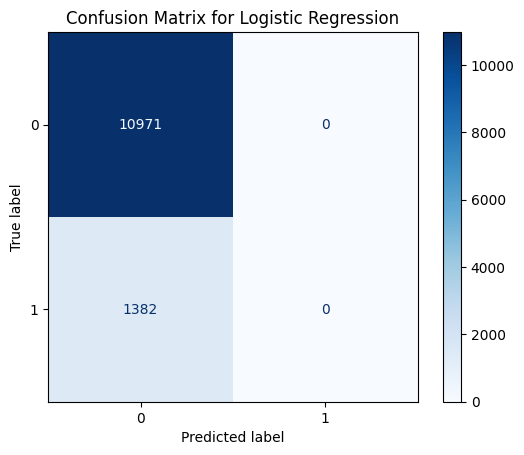

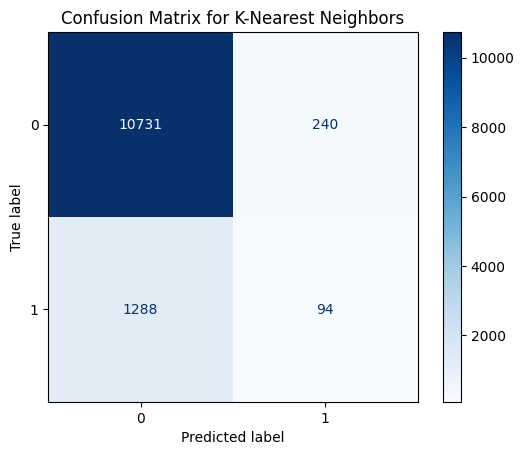

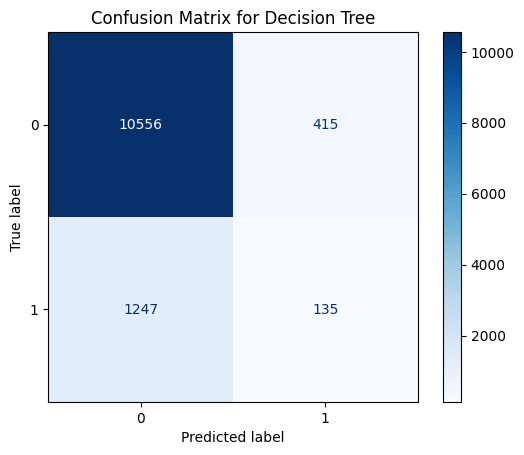

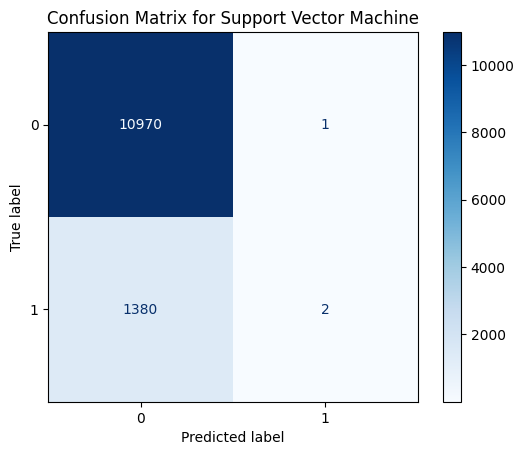

In [114]:
# Visualize the confusion matrices of each classifier on the data
for model_name, model in models.items():
    y_test_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

### Update 1: Including more features in the prediction

In [115]:
features = df.drop(columns=['y'])
target = df['y']

In [116]:

label_encoders = {}
for column in features.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    features[column] = label_encoders[column].fit_transform(features[column])

In [117]:
target_encoder = LabelEncoder()
target = target_encoder.fit_transform(target)

In [118]:
# Apply StandardScaler to the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
features = pd.DataFrame(scaled_features, columns=features.columns)

In [119]:
print("Prepared Features:")
print(features.head())

print("\nPrepared Target:")
print(target[:5])

Prepared Features:
        age       job   marital  education   default   housing     loan  \
0  1.533143 -0.201475 -0.283703  -1.753753 -0.513657 -1.087787 -0.45257   
1  1.629107  0.911363 -0.283703  -0.349596  1.945111 -1.087787 -0.45257   
2 -0.290177  0.911363 -0.283703  -0.349596 -0.513657  0.942065 -0.45257   
3 -0.002284 -1.036103 -0.283703  -1.285700 -0.513657 -1.087787 -0.45257   
4  1.533143  0.911363 -0.283703  -0.349596 -0.513657 -1.087787  2.31104   

    contact     month  day_of_week  duration  campaign     pdays  previous  \
0  1.318174  0.762504    -0.718775  0.010352 -0.565963  0.195443 -0.349551   
1  1.318174  0.762504    -0.718775 -0.421577 -0.565963  0.195443 -0.349551   
2  1.318174  0.762504    -0.718775 -0.124626 -0.565963  0.195443 -0.349551   
3  1.318174  0.762504    -0.718775 -0.413864 -0.565963  0.195443 -0.349551   
4  1.318174  0.762504    -0.718775  0.187751 -0.565963  0.195443 -0.349551   

   poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  eur

In [120]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=100)


##### Logistic regression with updated features

In [121]:
# Using logistic regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)


y_pred = log_reg.predict(X_test)




accuracy = accuracy_score(y_test, y_pred)

print("Logistic Regression Model Accuracy:", accuracy)

Logistic Regression Model Accuracy: 0.9133004128551769


###### **Here, we see that the Logistic Regression model's accuracy has improved to 91.3% compared to earlier, where it was 88.8%**

##### Comparing different classifiers

In [122]:
# Initialize four classification models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine": SVC()
}


In [123]:
# List to store results
results_list = []

# Train each classification model and calculate train time, train accuracy and test accuracy
for model_name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))

    results_list.append({
        "Model": model_name,
        "Train Time": train_time,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy
    })

# Convert results list to DataFrame
results_df = pd.DataFrame(results_list)

In [124]:
print(results_df)

                    Model  Train Time  Train Accuracy  Test Accuracy
0     Logistic Regression    0.463602        0.909517       0.913300
1     K-Nearest Neighbors    0.017120        0.926795       0.902534
2           Decision Tree    0.248466        1.000000       0.888691
3  Support Vector Machine   14.362729        0.919752       0.912572


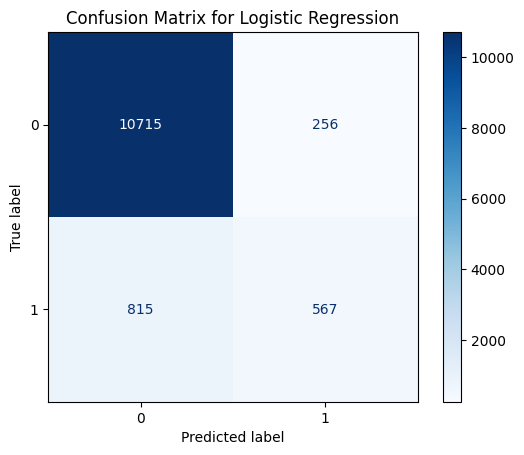

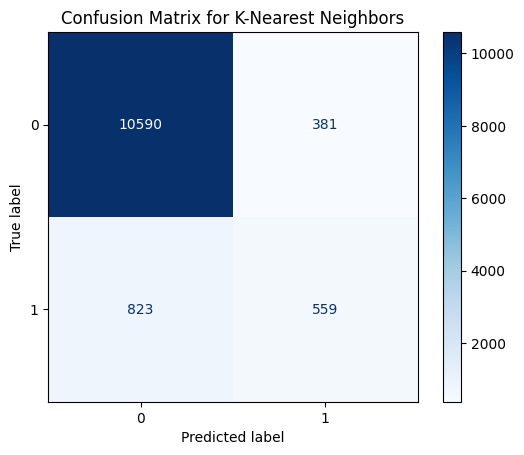

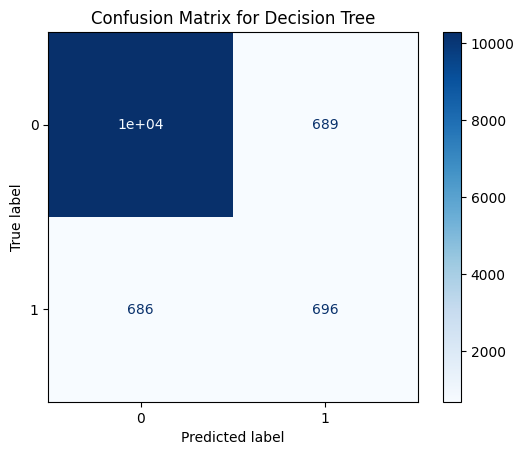

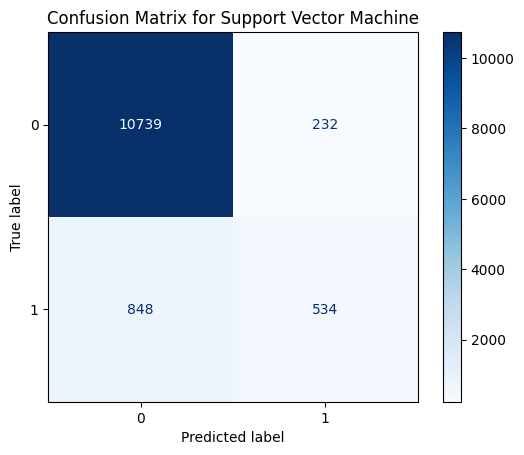

In [125]:
# Visualize the confusion matrices of each classifier on the data
for model_name, model in models.items():
    y_test_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

##### **The accuracy of the different classification models have gone by 2-3 percent as compared to the results in the previous section. From the confusion matrices, we can also observe that the classifiers are now predicting label 1 a lot more often than in the previous case, when we were working with a limited set of features.**

### Update 2 : Hyperparameter tuning using GridSearchCV

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import time

In [ ]:
# Initialize models with default settings
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine": SVC()
}

# Create an empty DataFrame to store results
results = pd.DataFrame(columns=["Model", "Train Time", "Train Accuracy", "Test Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"])


# Define parameter grids for each model
param_grids = {
    "Logistic Regression": {
        'C': [0.01, 0.1, 1, 10, 100]
    },
    "K-Nearest Neighbors": {
        'n_neighbors': [3, 5, 7, 9],
    },
    "Decision Tree": {
        'max_depth': [None, 10, 20, 30],
    },
    "Support Vector Machine": {
        'C': [0.01, 0.1, 1, 10],
        'kernel': ['linear', 'rbf']
        # 'gamma': ['scale', 'auto']
    }
}

# DataFrame to store results after hyperparameter tuning
tuned_results = pd.DataFrame(columns=["Model", "Best Params", "Train Time", "Train Accuracy", "Test Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"])

# Perform GridSearchCV for each model
for model_name in models.keys():

    print(f"Hyperparameter tuning for {model_name}...")
    grid_search = GridSearchCV(estimator=models[model_name], param_grid=param_grids[model_name], cv=5, scoring='accuracy')

    start_time = time.time()
    grid_search.fit(X_train, y_train)
    train_time = time.time() - start_time

    best_model = grid_search.best_estimator_

    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    roc_auc = roc_auc_score(y_test, y_test_pred)

    tuned_results = pd.concat([tuned_results, pd.DataFrame({
        "Model": [model_name],
        "Best Params": [grid_search.best_params_],
        "Train Time": [train_time],
        "Train Accuracy": [train_accuracy],
        "Test Accuracy": [test_accuracy],
        "Precision": [precision],
        "Recall": [recall],
        "F1 Score": [f1],
        "ROC AUC": [roc_auc]
    })], ignore_index=True)

print("\nResults after Hyperparameter Tuning:")
print(tuned_results)

Hyperparameter tuning for Logistic Regression...


<ipython-input-79-791b615655c7>:63: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tuned_results = pd.concat([tuned_results, pd.DataFrame({


Hyperparameter tuning for K-Nearest Neighbors...
Hyperparameter tuning for Decision Tree...
Hyperparameter tuning for Support Vector Machine...

Results after Hyperparameter Tuning:
                    Model                Best Params  Train Time  \
0     Logistic Regression                 {'C': 0.1}    2.113811   
1     K-Nearest Neighbors         {'n_neighbors': 9}   25.525519   
2           Decision Tree          {'max_depth': 10}    2.792084   
3  Support Vector Machine  {'C': 1, 'kernel': 'rbf'}  939.481489   

   Train Accuracy  Test Accuracy  Precision    Recall  F1 Score   ROC AUC  
0        0.909621       0.913462   0.690621  0.410275  0.514753  0.693562  
1        0.917427       0.905286   0.628954  0.374096  0.469147  0.673147  
2        0.943101       0.906986   0.597817  0.515195  0.553440  0.735767  
3        0.919752       0.912572   0.697128  0.386397  0.497207  0.682625  


#### Even after hyperpaprameter tuning, it is difficult to major improvements in the accuracy of the different classification models.  From the baseline model, we see that 88% of the samples belong to the same class. Hence the dataset is highly skewed towards samples from one class. This makes it challenging for AI models to learn how to accurately predict.